## Main goal : implement a kmean algorithm
### Import necessary libraries


In [1]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

## 1 --- Creation of a toy dataset (4 different clusters)
Set four centers


In [2]:
center_1 = np.array([1,1])
center_2 = np.array([15,15])
center_3 = np.array([23,2])
center_4 = np.array([35,1])

Generate random (gaussian) noise around these centers

In [9]:
data_1 = np.random.randn(50,2)*3+ center_1
data_2 = np.random.randn(200,2)*1 + center_2
data_3 = np.random.randn(180,2)*2 + center_3
data_4 = np.random.randn(250,2)*1.2 + center_4

Concatenate  data

In [10]:
data = np.concatenate((data_1, data_2, data_3,data_4), axis = 0)

Plot and save data

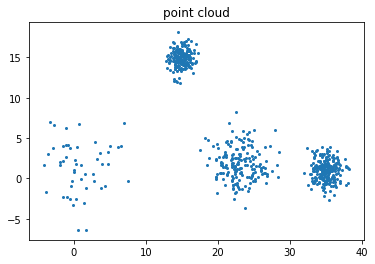

In [11]:
plt.clf()
plt.scatter(data[:,0], data[:,1], s=4)
plt.title('point cloud')
plt.savefig('point_clouds.png')

Definition of the k-mean function

In [12]:
def kmeans(data,k=3,name_output=None,iter_max=100):
    # Number of points
    n = data.shape[0]
    # Number of features
    c = data.shape[1]

    # Generate random centers inside the dataset
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,c)*std + mean

    # Plot the data and the centers generated as random
    # Plot the data and the centers generated as random
    if name_output is not None:
        plt.clf()
        plt.scatter(data[:,0], data[:,1], s=7)
        plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)
        plt.title('initial centers')
        plt.savefig('%s_initial_centers.png'%name_output)

    # Internal variables
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = deepcopy(centers) # Store new centers
    error = np.linalg.norm(centers_new - centers_old)
    iter = 0

    # clusters : array of size n with corresponding clusters
    clusters = np.zeros(n)
    # distances : nx4 matrix with distances to each center
    distances = np.zeros((n,k))

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0 or iter==iter_max:
        # Measure the distance to every center (see np.linalg.norm)
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
        # Assign all training data to closest center (see np.argmin)
        clusters = np.argmin(distances, axis = 1)
        # save old centers
        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        # compute and print error
        error = np.linalg.norm(centers_new - centers_old)
        print('iteration %d : error %.5f'%(iter,error))
        if np.isnan(error):
            print('nan : reset centers')
            centers_old = np.zeros(centers.shape)
            centers_new = np.random.randn(k,c)*std + mean

        iter+=1
    print('convergence after %d iterations'%iter)
    # plot
    if name_output is not None:
        plt.clf()
        plt.scatter(data[:,0], data[:,1], s=7)
        for i in range(k):
            plt.scatter(data[clusters==i,0], data[clusters==i,1], s=7+i*10)
        plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
        plt.title('clustering')
        plt.savefig('%s_result_with_%d_clusters.png'%(name_output,k))
    return clusters


iteration 0 : error 17.00240
iteration 1 : error 2.70385
iteration 2 : error 0.12082
iteration 3 : error 0.00000
convergence after 4 iterations


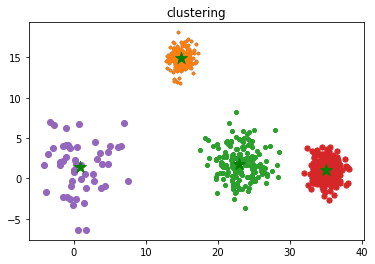

In [26]:
#clustering=kmeans(data,2,'clustering_2')
#clustering=kmeans(data,3,'clustering_3')
clustering=kmeans(data,4,'clustering_4')
#clustering=kmeans(data,14,'clustering_14')
